# <font color='blue'>Training a CNN in Caffe</font>

# <font color='blue'>1. Overview</font>

Caffe is a deep learning framework developed by the Berkeley Vision and Learning Center ( BVLC ). It is written primarily in C++, but also provide python and matlab wrappers. It has been widely used for training Convolutional Neural Networks. It provides a very simple interface for training and fine-tuning Neural Networks. We will discuss how to train a CNN using Caffe on Colab. The same instructions can be followed for any other system ( your own computer or AWS ).

<font color='red'>Note:</font> Before proceeding, open up a new notebook in Colab and change the runtime to Python 3 and GPU.

<font color='red'>Also, remember that if you need to restart your runtime or it restarts on its own, all variables and imported modules will be reset. Only the downloaded data will be intact. So, if you get any error, keep this in mind.</font>

# <font color='blue'>2. Installation</font>

## <font color='blue'>2.1. Installation on Colab</font>

For using shell commands from the notebook itself, you have to prepend the command with an "`!`".


```
!sudo apt-get install caffe-cuda
```
Shell command can also run using cell magic.

```
%%bash
sudo apt-get install caffe-cuda
```
##### <font color='blue'>Note for local installation:</font>
If you have ubuntu 17.04 or higher, you can use the same command as above.
```
sudo apt-get install caffe-cuda 
```
This will install the GPU version of Caffe on the system. 

If you want the CPU version, use
```
sudo apt-get install caffe-cpu
```
For Ubuntu 16.10 and lower, you have to go through the lengthy process of compiling caffe from source. You can find the instructions [here](http://caffe.berkeleyvision.org/installation.html) and [here](https://github.com/BVLC/caffe/wiki/Ubuntu-16.04-or-15.10-Installation-Guide).

**Let's use the second option for caffe-cuda installation in colab.**



In [0]:
%%bash
sudo apt-get install caffe-cuda

Output sample:

![alt text](https://www.dropbox.com/s/hs68yob146em8l9/caffe_install.PNG?dl=1)

# <font color='blue'>3. Caffe Training Process</font>

For training a Neural Network in Caffe you require 3 files : 
1. Architecture Definition file : The model architecture is described in a prototxt file. It describes the layers ( Convolution, Pooling etc ) and their parameters ( num of filters, pool size ). It is generally named `train_val.prototxt`.
2. Training Configuration file : In this file, we need to specify the training configuration - such how many iterations will we train, initial learning rate, how will the learning rate change and when, when to evaluate while training, when to save the model etc. It is generally named `solver.prototxt`.
3. Model Weights File ( Optional ): It is required when you want to initialize your network with some known model weights rather than starting from scratch. It has a file extension `.caffemodel`.

# <font color='blue'>4. Training a CNN in Caffe</font>

We will train a CNN using the VGG-16 architecture and its pre-trained weights to initialize the network. This approach almost always gives better results than training from scratch and also takes less time to converge. In Deep Learning jargon, this approach is called fine-tuning of the network. 

Assuming that you have read the previous chapter on Colab, we will not explain the usage of Colab. All instructions given here should be run on the Colab Notebook.

## <font color='blue'>4.1. The Problem</font>
Let us define the problem we are going to solve. It is a simple clasification problem for detecting the orientation of the face. There will be 4 classes corresponding to the 4 roataions of the upright image. 
1. Class 0 - Straight face
2. Class 1 - Clockwise 90 Rotation
3. Class 2 - Counter-Clockwise 90 Rotation
4. Class 3 - 180 Rotation


![](https://i.imgur.com/Fx3hKo9.png)

We will use the Helen Dataset which has 2000 images for training and 330 images for validation. We will use 500 images per class for training and similarly divide the validation set into 82 images per class with the last class of 84 images.

## <font color='blue'>4.2. Step 1 : Download the model</font>
We have provided the `train_val.prototxt` and `solver.prototxt` file along with other code required in a github repository which you can clone.

We will also download the pre-trained VGG-16 Caffe model. Later in this module, we will fine-tune with our dataset. If you are working from a local system you can download the model weights file from [this link](http://www.robots.ox.ac.uk/~vgg/software/very_deep/caffe/VGG_ILSVRC_16_layers.caffemodel). However, we will use wget to download the data in colab environment.  

**Let's proceed.**

In [5]:
import os
!wget "https://www.dropbox.com/s/9ozu5tpwswkjugc/training_cnn_in_caffe.zip?dl=1" -O training_cnn_in_caffe.zip
!unzip training_cnn_in_caffe.zip
os.chdir("training_cnn_in_caffe")
!wget http://www.robots.ox.ac.uk/~vgg/software/very_deep/caffe/VGG_ILSVRC_16_layers.caffemodel

--2020-01-10 17:37:17--  https://www.dropbox.com/s/9ozu5tpwswkjugc/training_cnn_in_caffe.zip?dl=1
Resolving www.dropbox.com... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/9ozu5tpwswkjugc/training_cnn_in_caffe.zip [following]
--2020-01-10 17:37:19--  https://www.dropbox.com/s/dl/9ozu5tpwswkjugc/training_cnn_in_caffe.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc314b59c5b086223e4154777f38.dl.dropboxusercontent.com/cd/0/get/Av5ClhMV2YktzpUrBcFsPqSch2BDprM6Z93tzHaYu66rTF765bJKlD0sL9ZWQf4xG771JN09LK4tYSUGRJ8WYgBJQfjp9hjVBvy9r2hbb3R1ZZnPnwDhvDC1Sk3cF_MwVb4/file?dl=1# [following]
--2020-01-10 17:37:19--  https://uc314b59c5b086223e4154777f38.dl.dropboxusercontent.com/cd/0/get/Av5ClhMV2YktzpUrBcFsPqSch2BDprM6Z93tzHaYu66rTF765bJKlD0sL9ZWQf4xG771JN09LK4tYSUGRJ8WYgBJQfjp9hjVBvy9r2hbb3

**Check that the repo contains the weights file and the train_val and solver files.**

In [6]:
!ls

VGG_ILSVRC_16_layers.caffemodel   solver.prototxt
caffe_inference.py                solver_lmdb.prototxt
create_dataset.py                 solver_txtfiles.prototxt
create_lmdb.sh                    test_images
create_txt_files.py               train_val.prototxt
deploy.prototxt                   train_val_using_lmdb.prototxt
opencv_inference.py               train_val_using_txtfiles.prototxt


## <font color='blue'>4.3. Step 2 : Download the Data</font>
If you are working from a local system you can download the Helen Dataset from [this link](http://www.ifp.illinois.edu/~vuongle2/helen/). However, we will use `wget` to download the data in colab environment. There would be 5 folders. We will use 4 folders named `helen_1` to `helen_4` for training and `helen_5` for validation.


In [7]:
!mkdir data
os.chdir("data")
!wget http://www.ifp.illinois.edu/~vuongle2/helen/data/helen_1.zip
!wget http://www.ifp.illinois.edu/~vuongle2/helen/data/helen_2.zip
!wget http://www.ifp.illinois.edu/~vuongle2/helen/data/helen_3.zip
!wget http://www.ifp.illinois.edu/~vuongle2/helen/data/helen_4.zip
!wget http://www.ifp.illinois.edu/~vuongle2/helen/data/helen_5.zip

--2020-01-10 17:39:57--  http://www.ifp.illinois.edu/~vuongle2/helen/data/helen_1.zip
Resolving www.ifp.illinois.edu... 130.126.122.239
Connecting to www.ifp.illinois.edu|130.126.122.239|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96876123 (92M) [application/zip]
Saving to: ‘helen_1.zip’

helen_1.zip         100%[===================>]  92.39M  3.37MB/s    in 32s     

2020-01-10 17:40:29 (2.91 MB/s) - ‘helen_1.zip’ saved [96876123/96876123]

--2020-01-10 17:40:29--  http://www.ifp.illinois.edu/~vuongle2/helen/data/helen_2.zip
Resolving www.ifp.illinois.edu... 130.126.122.239
Connecting to www.ifp.illinois.edu|130.126.122.239|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106113055 (101M) [application/zip]
Saving to: ‘helen_2.zip’

helen_2.zip         100%[===================>] 101.20M  3.51MB/s    in 33s     

2020-01-10 17:41:03 (3.07 MB/s) - ‘helen_2.zip’ saved [106113055/106113055]

--2020-01-10 17:41:03--  http://www.ifp.illino

Output sample:

![alt text](https://www.dropbox.com/s/hxwng7bdu2pcccm/data_download.PNG?dl=1)

**Now unzip the files**

In [0]:
%%bash
unzip helen_1.zip
unzip helen_2.zip
unzip helen_3.zip
unzip helen_4.zip
unzip helen_5.zip

Output sample:

![alt text](https://www.dropbox.com/s/j4o3ting5aoju0v/unzip.PNG?dl=1)

**Delete the zip files**

In [0]:
%%bash
rm helen_1.zip
rm helen_2.zip
rm helen_3.zip
rm helen_4.zip
rm helen_5.zip

**Put the `helen_5` folder in a folder named `val` and the rest in folder `train`**

In [0]:
%%bash
mkdir train
mkdir val
mv helen_5 val
mv helen_* train

**Go back to the root directory of the repo where the rest of the code is residing**

In [0]:
os.chdir("..")

## <font color='blue'>4.4. Step 3 : Prepare the data</font>
We will first convert the `helen_5` folder into 4 subfolders by dividing the total number of images in 4 folders similar to the `train` set.

In [0]:
import os, glob
# Create subfolders using the helen_5 folder
# Divide the total number of images into 4 parts 
# and move them into coressponding folder
valFiles = glob.glob("data/val/helen_5/*")

for i in range(4):
    os.makedirs("data/val/helen_{}".format(i+1))
    for j in range( int(i*len(valFiles)/4) , 
                    int((i+1)*len(valFiles)/4) ):
                    os.rename(valFiles[j], 
                    "data/val/helen_{}/{}.jpg".format(i+1, j))

os.removedirs("data/val/helen_5/")

We will next create a new dataset from the downloaded data by rotating images as mentioned above and then prepare the dataset so that we can feed it to the network for training.

We will discuss 2 ways of supplying the data for training. They are : 
1. Using a txt file with `ImageData` Layer
2. Using LMDB database with `Data` Layer.

You can use any one of them in your experiment. But do try both of them to get an understanding.

### <font color='blue'>Step 3a : Create Dataset</font>
As discussed above, we will use `3` rotations `(90, -90, 180)` for the other `3` classes apart from the straight face. We will use OpenCV library for rotating the images and save them in the respective directories.

In [10]:
import glob
import cv2

folders = ["helen_2", "helen_3", "helen_4"]
rotation = [cv2.ROTATE_90_CLOCKWISE,
            cv2.ROTATE_90_COUNTERCLOCKWISE, 
            cv2.ROTATE_180]

for index, folder in enumerate(folders):
    print("processing {}".format(folder))
    trainFiles = glob.glob("data/train/{}/*".format(folder))
    valFiles = glob.glob("data/val/{}/*".format(folder))
    for fi in trainFiles:
        im = cv2.imread(fi)
        im = cv2.rotate(im, rotation[index])
        cv2.imwrite(fi,im)
    for fi in valFiles:
        im = cv2.imread(fi)
        im = cv2.rotate(im, rotation[index])
        cv2.imwrite(fi,im)

print("New DataSet created")

processing helen_2
processing helen_3
processing helen_4
New DataSet created


### <font color='blue'>Step 3b : Create `.txt` files</font>

In [11]:
# Path to train and val folders
TRAIN_DATA_DIR = "data/train"
VAL_DATA_DIR = "data/val"

# Get the folders inside the train and val folders
trainFolders = glob.glob("{}/*".format(TRAIN_DATA_DIR))
valFolders = glob.glob("{}/*".format(VAL_DATA_DIR))

trainFolders.sort()
valFolders.sort()

# Open the train and val files for writing
train_file = open("train_files.txt","w")
val_file = open("val_files.txt","w")

# Find the images
# write the image path along with the class in the txt file
for i in range(len(trainFolders)):
    files = glob.glob("{}/*".format(trainFolders[i]))
    for fi in files:
        train_file.writelines('{} {}\n'.format(fi, i))
train_file.close()

for i in range(len(valFolders)):
    files = glob.glob("{}/*".format(valFolders[i]))
    for fi in files:
        val_file.writelines('{} {}\n'.format(fi, i))
val_file.close()

# Create a file to save the mapping between 
# class number and actual label
class2label = ["Straight", "Right", "Left", "Upside-Down"]
class_mapping_file = open("class2label.txt","w")
for cl, label in enumerate(class2label):
    class_mapping_file.writelines("{} {}\n".format(cl, label))
class_mapping_file.close()

print("Text files created")

!ls *.txt

Text files created
class2label.txt  CMakeLists.txt  train_files.txt  val_files.txt


### <font color='blue'>Step 3c : Create LMDB database ( optional )</font>
You can use the same txt files to create a LMDB database. If you have large disk space, it is a good practise to create LMDB database. It speeds up the training process by a order of magnitude, specially if the images are download from internet and you dont know their size. It is a one time process which will acclearate your training.

To convert a data folder to a LMDB database, you can use the Caffe command convert_imageset. It takes arguments : 
1. resize height and resize width.
2. shuffle or not.
3. root directory of the train or val folder.
4. txt file containing the location of images.
5. name of the lmdb to be created.

In [12]:
%%bash
convert_imageset --resize_height=256 --resize_width=256 --shuffle ./ train_files.txt train_lmdb
convert_imageset --resize_height=256 --resize_width=256 --shuffle ./ val_files.txt val_lmdb

I1222 23:51:23.171636  1554 convert_imageset.cpp:86] Shuffling data
I1222 23:51:24.262444  1554 convert_imageset.cpp:89] A total of 2000 images.
I1222 23:51:24.263974  1554 db_lmdb.cpp:35] Opened lmdb train_lmdb
I1222 23:51:44.074291  1554 convert_imageset.cpp:147] Processed 1000 files.
I1222 23:52:03.072227  1554 convert_imageset.cpp:147] Processed 2000 files.
I1222 23:52:03.260637  1564 convert_imageset.cpp:86] Shuffling data
I1222 23:52:03.587828  1564 convert_imageset.cpp:89] A total of 330 images.
I1222 23:52:03.589105  1564 db_lmdb.cpp:35] Opened lmdb val_lmdb
I1222 23:52:13.282817  1564 convert_imageset.cpp:153] Processed 330 files.


**You should compare the training times when you use simple `txt` file and when you use `LMDB database`. You will be amazed!**

## <font color='blue'>4.5. Step 4 : Modify `prototxt` files</font>
We have already made the required changes in the two files `train_val` and `solver` prototxt files. The following is the gist of what changes were made for your reference.
### `train_val.prototxt` file
1. Change the `Name` of the last layer i.e. `fc8` to `fc8_face` or any other name. This will ensure that the weights of the last layer are not loaded.
```
layer {
  name: "fc8" --> "fc8_face"  # change fc8 to fc8_face
  bottom: "fc7"
  top: "fc8" --> "fc8_face"
  type: "InnerProduct"
  inner_product_param {
    num_output: 1000
  }
  param {
    lr_mult: 1
  }
  param {
    lr_mult: 1
  }
}
layer {
  name: "loss"
  type: "SoftmaxWithLoss"
  bottom: "fc8" --> "fc8_face"  # change fc8 to fc8_face
  bottom: "label"
  top: "loss/loss"
}
layer {
  name: "accuracy"
  type: "Accuracy"
  bottom: "fc8" --> "fc8_face"  # change fc8 to fc8_face
  bottom: "label"
  top: "accuracy"
  include: { phase: TEST }
}
```
2. Change the num_output of last layer to the `#classes` ( `4` in our case ).
```
layer {
  name: "fc8_face"
  bottom: "fc7"
  top: fc8_face"
  type: "InnerProduct"
  inner_product_param {
    num_output: 1000 --> 4     # change 1000 to 4
  }
  param {
    lr_mult: 1
  }
  param {
    lr_mult: 1
  }
}
```

3. Specify which layers are to be trained. This is done using `lr_mult` parameter. It is set to `0` if you don't want to train the network. Hence, we are interested in fine-tuning; we will update a few last layer weight.
```
layer {
  bottom: "data"
  top: "conv1_1"
  name: "conv1_1"
  type: "Convolution"
  convolution_param {
    num_output: 64
    pad: 1
    kernel_size: 3
  }
  param {
    lr_mult: 0     # This is 0 because we don't want to update conv1_1 weight
  }
  param {
    lr_mult: 0     # This is 0 because we don't want to update conv1_1 weight
  }
}
.
.
.
layer {
  name: "fc8_face"
  bottom: "fc7"
  top: "fc8_face"
  type: "InnerProduct"
  inner_product_param {
    num_output: 4
  }
  param {
    lr_mult: 1    # This is 1 because we want to update weight of fully connected layer
  }
  param {
    lr_mult: 1    # This is 1 because we want to update weight of fully connected layer
  }
}
```

4. Specify whather you are using `ImageData` layer ( for `txt` file ) or `Data` layer (for `LMDB database`).
```
layer {
  name: "data"
  type: "Data"   #ImageData layer (for txt file) or Data layer (for LMDB database)
  top: "data"
  top: "label"
  include {
    phase: TRAIN
  }
```
OR
```
layer {
  name: "data"
  type: "ImageData"   #ImageData layer (for txt file) or Data layer (for LMDB database)
  top: "data"
  top: "label"
  include {
    phase: TRAIN
  }
```

We will see this in detail in the next section.

4. Specify the parameters of layers as `crop_size`, `batch_size`, `mirror` etc.
```
layer {
  name: "data"
  type: "ImageData"
  top: "data"
  top: "label"
  include {
    phase: TRAIN
  }
  transform_param {    # Image transform parameters
    crop_size: 224
    mean_value: 104
    mean_value: 117
    mean_value: 123
    mirror: false
  }                  
  image_data_param {
    source: "train_files.txt"
    batch_size: 50     # Specify the batch size
    new_height: 256
    new_width: 256
    shuffle: true
  }
}
```


**We have created two `train_val` files for ease of use.** 
1. `train_val_using_lmdb.prototxt` - uses LMDB data for training
2. `train_val_using_txtfiles.prototxt` - takes data from txt files for training

### `solver.prototxt` file
In this file, we specify the following parameters.
1. `net` : It is the path to the configuration `train_val.prototxt` file
2. `test_iter` : number of iterations to be performed while validation. We have kept the batch_size for validation data in train_val.prototxt as 30. We have 330 images. Thus, 11 iterations are needed to complete 330 images.
3. `test_interval` : After how many iterations do we check the validation accuracy
4. `base_lr` : Initial Learning rate 
5. `lr_policy` : How will the learning rate change as training progresses. This is required since we cannot use the same learning rate for the whole training process. We should decrease the LR as we reach near the minima.
6. `stepsize` : This is the number of iterations after which the LR will be changed.
7. `gamma` : this value is multiplied to the current LR when we reach the `stepsize` number of iterations
8. `display` : This is the number of iterations after which the status will be displayed on the console.
9. `max_iter` : Maximum number of iterations for training. Training will stop after reaching this number of iterations.
10. `momentum` : This is a parameter for the optimizer. Genrally kept at 0.9
11. `weight_decay` : this is the regularization parameter wo prevent overfitting
12. `snapshot` : this is the number of iterations after which the network weights will be saved. This is useful since we can start from this saved point in case something fails or overfitting starts or something bad happens ( Colab crashes! )
13. `snapshot_prefix` : the name of the saved weights file
14. `solver_mode` : GPU or CPU backend

```
net: "train_val.prototxt"
test_iter: 11
test_interval: 20
base_lr: 0.0001
lr_policy: "step"
stepsize: 40
gamma: 0.1
display: 10
max_iter: 200
momentum: 0.9
weight_decay: 0.0005
snapshot: 100
snapshot_prefix: "vggnet_train"
solver_mode: GPU
```

**We have created two solver files for ease of use.** 
1. `solver_lmdb.prototxt` - for LMDB
1. `solver_txtfiles.prototxt` - for txt files

### <font color='blue'>Step 4a : Using Data Layer (For LMDB Data)</font>
For LMDB Data, the prototxt file should look like this
```
layer {
  name: "data"
  type: "Data"    # <---
  top: "data"
  top: "label"
  include {
    phase: TRAIN
  }
  transform_param {
    crop_size: 227
    mean_value: 104
    mean_value: 117
    mean_value: 123
    mirror: false   # <---
  }
  data_param {
    source: "train_lmdb"  # <---
    batch_size: 50
    backend: LMDB     # <---
  }
}
```
**We have created a separate `train_val_using_lmdb.prototxt` file for training using LMDB**

We will use the same mean as ImageNet ( since the network was trained on ImageNet ). You can however, find the mean of the dataset using the tool `compute_image_mean` available in Caffe to compute the mean image of the database.

### <font color='blue'>Step 4b : Using ImageData Layer (For txt file)</font>
ImageData layer uses txt files, `train_files.txt` and `val_files.txt` with the image path names and the class separated by a space or tab.
```
layer {
  name: "data"
  type: "ImageData"   # <---
  top: "data"
  top: "label"
  include {
    phase: TRAIN
  }
  transform_param {
    crop_size: 224
    mean_value: 104
    mean_value: 117
    mean_value: 123
    mirror: false   # <---
  }
  image_data_param {
    source: "train_files.txt"  # <---
    batch_size: 50
    new_height: 256
    new_width: 256
    shuffle: true
  }
}
```

**We have created a separate `train_val_using_txtfiles.prototxt` file for training using image files.**

## <font color='blue'>4.6. Step 5 : Train</font>
We have everything in place to start training i.e. We have created a `txt` file and a `LMDB` database for the training/val data and modified the `train_val.prototxt` and `solver.prototxt` files.

To start training, we need to execute the following command:

##### For training using LMDB

In [0]:
!caffe train --solver solver_lmdb.prototxt --weights VGG_ILSVRC_16_layers.caffemodel 

##### For training using Image files

In [0]:
!caffe train --solver solver_txtfiles.prototxt --weights VGG_ILSVRC_16_layers.caffemodel

You should get an output similar to this and you can check the process.

![alt text](https://www.dropbox.com/s/thyth7914eqnf9l/caffe_train_output.PNG?dl=1)

**Once the training is complete, you can use the trained `.caffemodel` file along with the `deploy.prototxt` file to deploy your learned model to perform inference. The `deploy.prototxt` file is similar to the train_val.protoxt except that the parameters that we set for learning are not present such as `lr_mult` etc. Also, we do not calculate loss and accuracy while performing inference, thus those two layers are also absent.**

## <font color='blue'>4.7. Step 6 : Perform Inference</font>
The file has been given in the repo as `caffe_inference.py`
Specify the file paths

Predicted Class : Left , Confidence : 0.9998910427093506


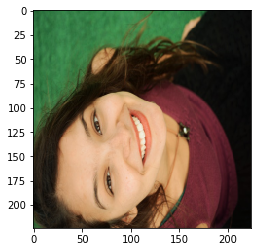

In [28]:
import numpy as np
import caffe
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

protoFile = "deploy.prototxt"
weightsFile = "face_orientation_iter_100.caffemodel"
imageFile = "test_images/left.jpg"
class2label = []
with open("class2label.txt") as fi:
    data = fi.readlines()

for i in range(len(data)):
    cl, label = data[i].strip().split()
    class2label.append(label)

input_height, input_width = 224, 224
img_mean = np.array([104, 117, 123], dtype=np.float32)

caffe.set_mode_gpu()
net = caffe.Net(protoFile, weightsFile, caffe.TEST)

im = caffe.io.load_image(imageFile)
im = caffe.io.resize_image(im, [input_height, input_width])

transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2, 0, 1))  # row to col
transformer.set_channel_swap('data', (2, 1, 0))  # RGB to BGR
transformer.set_raw_scale('data', 255)  # [0,1] to [0,255]
transformer.set_mean('data', img_mean)

net.blobs['data'].reshape(1, 3, input_height, input_width)
net.blobs['data'].data[...] = transformer.preprocess('data', im)
out = net.forward()
prob = out['prob'][0]
pred_class = np.argmax(prob)

print('Predicted Class : {} , Confidence : {}'.format(class2label[pred_class], prob[pred_class]))

plt.imshow(im)

## <font color='blue'>4.8. Step 7 : Saving the Model to Google drive</font>

Now that you have successfully trained the model, you would want to download the model before your time runs out on Colab. Also, we will se in the next section, how to load the model in OpenCV

##### Mount Google Drive on Colab

Next, You have to mount the drive on Colab so that you can use it as just like an external Hard drive.


In [0]:
# Loads the drive library and mounts your Google drive as a network mapped drive for the Google Colab Virtual Machine.
from google.colab import drive
drive.mount('/content/gdrive')

You can check that your current directory contains a folder named `gdrive`. Check whether the contents are same as in your Google Drive 

In [38]:
!ls
os.chdir("/content/drive/My Drive")
## Uncomment below if wish to see files in your google drive
# !ls

caffe_inference.py		       opencv_inference.py
class2label.txt			       solver_lmdb.prototxt
CMakeLists.txt			       solver.prototxt
create_dataset.py		       solver_txtfiles.prototxt
create_lmdb.sh			       test_images
create_txt_files.py		       train_files.txt
data				       train_lmdb
deploy.prototxt			       train_val.prototxt
drive				       train_val_using_lmdb.prototxt
face_orientation_iter_100.caffemodel   train_val_using_txtfiles.prototxt
face_orientation_iter_100.solverstate  val_files.txt
face_orientation_iter_200.caffemodel   val_lmdb
face_orientation_iter_200.solverstate  VGG_ILSVRC_16_layers.caffemodel
opencv_inference.cpp


#### Copy your model to Drive

Now, you can copy your trained model to your drive just like a hard drive!

In [37]:
os.makedirs("caffe-face-orientation")
!cp ../../training_cnn_in_caffe/face_orientation_iter_200.caffemodel caffe-face-orientation
!ls caffe-face-orientation

face_orientation_iter_200.caffemodel


## <font color='blue'>5. Exercise</font>

I hope it went well till now without any difficulties. Now is the time to explore. I will give some simple tasks for you to perform by changing certain things in the files and see what happens. You should complete those and explore further on those lines to get a better grasp of what's happening.


### <font color='blue'>Exercise 1 : Change Learning Rate</font>

HINT : It can be changed in the solver prototxt files. You can increase / decrease the value and see what happens. Please mention in the comments if you find anything unexpected.

### <font color='blue'>Exercise 2 : Train less layers</font>
HINT : In the train_val prototxt files, decrease the number of layers you are training. It can be done by changing the `lr_mult` to `0` for the layer you want to modify.

### <font color='blue'>Exercise 3 : Do the same experiment for a different Network</font>
Do the same experiment for the Caffenet Network. You can download it from the Caffe Model zoo - https://github.com/BVLC/caffe/tree/master/models/bvlc_reference_caffenet. You have to modify the train_val and solver files in the same way we did in the previous steps. You can either do a wget or clone the entire repo to Colab.

Does the accuracy increase or decrease?

Try out other models like GoogleNet, AlexNet which are present in the same [models folder](https://github.com/BVLC/caffe/tree/master/models).

## <font color='blue'>References</font>

https://github.com/intel/caffe/wiki/How-to-create-ImageNet-LMDB

https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d